In [1]:
import os, shutil
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
def plot_accuracy_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

In [4]:
def create_directory(directory):
    try:
        os.mkdir(directory)
    except OSError:
        print("The %(dir)s directory already exists." % {"dir": directory}) 

In [5]:
original_dataset_dir = '/home/maalde/notebooks/DevMeetingCSE/datasets/dogs-vs-cats/train'
base_dir = '/home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small'
create_directory(base_dir)

The /home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small directory already exists.


In [6]:
train_dir = os.path.join(base_dir, 'train')
create_directory(train_dir)   
validation_dir = os.path.join(base_dir, 'validation')
create_directory(validation_dir)
test_dir = os.path.join(base_dir, 'test')
create_directory(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
create_directory(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
create_directory(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
create_directory(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
create_directory(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
create_directory(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
create_directory(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

The /home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small/train directory already exists.
The /home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small/validation directory already exists.
The /home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small/test directory already exists.
The /home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small/train/cats directory already exists.
The /home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small/train/dogs directory already exists.
The /home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small/validation/cats directory already exists.
The /home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small/validation/dogs directory already exists.
The /home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small/test/cats directory already exists.
The /home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small/test/dogs directory already exists.


In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Instantiating a small convnet for dogs vs. cats classification

In [8]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [14]:
tensorboard_dir = '/home/maalde/notebooks/DevMeetingCSE/tensorboard_log/small'
create_directory(tensorboard_dir)
shutil.rmtree(tensorboard_dir)
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir=tensorboard_dir,
        write_grads=True,
        write_images=True
    )
]

The /home/maalde/notebooks/DevMeetingCSE/tensorboard_log/small directory already exists.


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=callbacks)

Epoch 1/30
100/100 [==============================] - 20s 197ms/step - loss: 0.6918 - acc: 0.5285 - val_loss: 0.7009 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 7s 74ms/step - loss: 0.6662 - acc: 0.5890 - val_loss: 0.6616 - val_acc: 0.5780
Epoch 3/30
100/100 [==============================] - 7s 74ms/step - loss: 0.6227 - acc: 0.6670 - val_loss: 0.6202 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5709 - acc: 0.6965 - val_loss: 0.5985 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5396 - acc: 0.7255 - val_loss: 0.5993 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5075 - acc: 0.7400 - val_loss: 0.5775 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 7s 74ms/step - loss: 0.4778 - acc: 0.7660 - val_loss: 0.5681 - val_acc: 0.7100
Epoch 8/30
100/100 [==============================] - 8s 76ms/step 

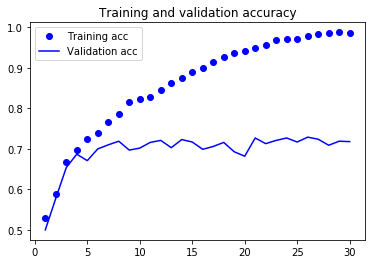

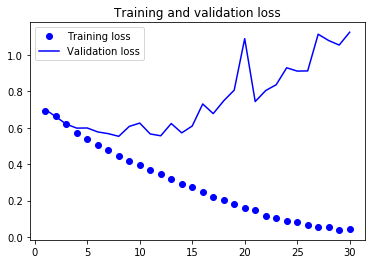

In [16]:
plot_accuracy_loss(history)

## Using Data Augmentation

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [18]:
from keras.preprocessing import image
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

In [19]:
# Choose one image to augment
img_path = fnames[0]

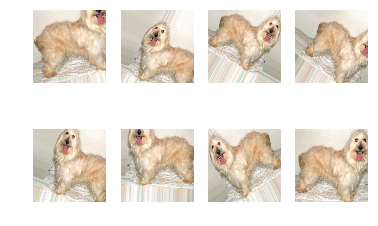

In [20]:
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 4, i+1)
    plt.axis('off')
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 8 == 0:
        break
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
# The validation data shouldn't be augmentated
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [24]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [25]:
tensorboard_dir = '/home/maalde/notebooks/DevMeetingCSE/tensorboard_log/data_augmentation'
create_directory(tensorboard_dir)
shutil.rmtree(tensorboard_dir)
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir=tensorboard_dir,
        write_grads=True,
        write_images=True
    )
]

The /home/maalde/notebooks/DevMeetingCSE/tensorboard_log/data_augmentation directory already exists.


In [26]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=callbacks)

Epoch 1/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6930 - acc: 0.5225 - val_loss: 0.6870 - val_acc: 0.5508
Epoch 2/100
100/100 [==============================] - 23s 231ms/step - loss: 0.6802 - acc: 0.5581 - val_loss: 0.6655 - val_acc: 0.5715
Epoch 3/100
100/100 [==============================] - 23s 232ms/step - loss: 0.6725 - acc: 0.5712 - val_loss: 0.6733 - val_acc: 0.5482
Epoch 4/100
100/100 [==============================] - 24s 236ms/step - loss: 0.6518 - acc: 0.6016 - val_loss: 0.6759 - val_acc: 0.5625
Epoch 5/100
100/100 [==============================] - 23s 230ms/step - loss: 0.6455 - acc: 0.6109 - val_loss: 0.6233 - val_acc: 0.6409
Epoch 6/100
100/100 [==============================] - 25s 255ms/step - loss: 0.6150 - acc: 0.6597 - val_loss: 0.5821 - val_acc: 0.6881
Epoch 7/100
100/100 [==============================] - 23s 231ms/step - loss: 0.6124 - acc: 0.6697 - val_loss: 0.6063 - val_acc: 0.6377
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 23s 233ms/step - loss: 0.4144 - acc: 0.8169 - val_loss: 0.4591 - val_acc: 0.7951
Epoch 62/100
100/100 [==============================] - 24s 237ms/step - loss: 0.4091 - acc: 0.8216 - val_loss: 0.4784 - val_acc: 0.7754
Epoch 63/100
100/100 [==============================] - 24s 239ms/step - loss: 0.4048 - acc: 0.8159 - val_loss: 0.4300 - val_acc: 0.8144
Epoch 64/100
100/100 [==============================] - 23s 229ms/step - loss: 0.4143 - acc: 0.8122 - val_loss: 0.4679 - val_acc: 0.7829
Epoch 65/100
100/100 [==============================] - 23s 231ms/step - loss: 0.3976 - acc: 0.8209 - val_loss: 0.4418 - val_acc: 0.8052
Epoch 66/100
100/100 [==============================] - 23s 231ms/step - loss: 0.3965 - acc: 0.8187 - val_loss: 0.4223 - val_acc: 0.8209
Epoch 67/100
100/100 [==============================] - 23s 232ms/step - loss: 0.3936 - acc: 0.8309 - val_loss: 0.4284 - val_acc: 0.8096
Epoch 68/100
100/100 [===================

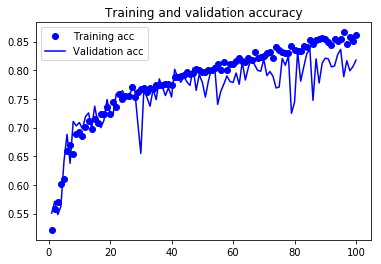

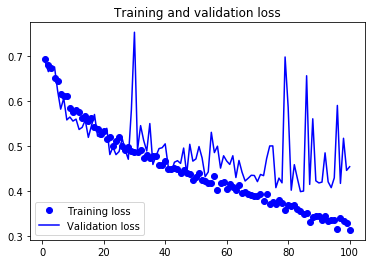

In [27]:
plot_accuracy_loss(history)

## Using a pre-trained Network - Trained with ImageNet

#### Feature extraction
Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

As we saw previously, convnets used for image classification comprise two parts: they start with a series of pooling and convolution layers, and they end with a densely-connected classifier. The first part is called the "convolutional base" of the model. In the case of convnets, "feature extraction" will simply consist of taking the convolutional base of a previously-trained network, running the new data through it, and training a new classifier on top of the output.

<img src=https://s3.amazonaws.com/book.keras.io/img/ch5/swapping_fc_classifier.png width="500">

Why only reuse the convolutional base? Could we reuse the densely-connected classifier as well? In general, it should be avoided. The 
reason is simply that the representations learned by the convolutional base are likely to be more generic and therefore more reusable: the 
feature maps of a convnet are presence maps of generic concepts over a picture, which is likely to be useful regardless of the computer 
vision problem at hand. On the other end, the representations learned by the classifier will necessarily be very specific to the set of 
classes that the model was trained on -- they will only contain information about the presence probability of this or that class in the 
entire picture. Additionally, representations found in densely-connected layers no longer contain any information about _where_ objects are 
located in the input image: these layers get rid of the notion of space, whereas the object location is still described by convolutional 
feature maps. For problems where object location matters, densely-connected features would be largely useless.

Note that the level of generality (and therefore reusability) of the representations extracted by specific convolution layers depends on 
the depth of the layer in the model. Layers that come earlier in the model extract local, highly generic feature maps (such as visual 
edges, colors, and textures), while layers higher-up extract more abstract concepts (such as "cat ear" or "dog eye"). So if your new 
dataset differs a lot from the dataset that the original model was trained on, you may be better off using only the first few layers of the 
model to do feature extraction, rather than using the entire convolutional base.

In our case, since the ImageNet class set did contain multiple dog and cat classes, it is likely that it would be beneficial to reuse the 
information contained in the densely-connected layers of the original model. However, we will chose not to, in order to cover the more 
general case where the class set of the new problem does not overlap with the class set of the original model.

Let's put this in practice by using the convolutional base of the VGG16 network, trained on ImageNet, to extract interesting features from 
our cat and dog images, and then training a cat vs. dog classifier on top of these features.

The VGG16 model, among others, comes pre-packaged with Keras. You can import it from the `keras.applications` module. Here's the list of 
image classification models (all pre-trained on the ImageNet dataset) that are available as part of `keras.applications`:

* Xception
* InceptionV3
* ResNet50
* VGG16
* VGG19
* MobileNet

Let's instantiate the VGG16 model:

In [28]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [29]:
base_dir = '/home/maalde/notebooks/DevMeetingCSE/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

# You’ll feed them to a densely connected classifier, so first you must flatten them
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])

In [31]:
tensorboard_dir = '/home/maalde/notebooks/DevMeetingCSE/tensorboard_log/pre_trained_VGG16'
create_directory(tensorboard_dir)
shutil.rmtree(tensorboard_dir)
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir=tensorboard_dir,
        write_grads=True,
        write_images=True
    )
]

The /home/maalde/notebooks/DevMeetingCSE/tensorboard_log/pre_trained_VGG16 directory already exists.


In [32]:
history = model.fit(train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels),
    callbacks=callbacks)

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 372us/step - loss: 0.5915 - acc: 0.6860 - val_loss: 0.4320 - val_acc: 0.8370
Epoch 2/30
2000/2000 [==============================] - 1s 323us/step - loss: 0.4262 - acc: 0.8100 - val_loss: 0.3591 - val_acc: 0.8630
Epoch 3/30
2000/2000 [==============================] - 1s 334us/step - loss: 0.3495 - acc: 0.8545 - val_loss: 0.3283 - val_acc: 0.8640
Epoch 4/30
2000/2000 [==============================] - 1s 346us/step - loss: 0.3097 - acc: 0.8700 - val_loss: 0.2983 - val_acc: 0.8860
Epoch 5/30
2000/2000 [==============================] - 1s 329us/step - loss: 0.2816 - acc: 0.8870 - val_loss: 0.2844 - val_acc: 0.8890
Epoch 6/30
2000/2000 [==============================] - 1s 334us/step - loss: 0.2626 - acc: 0.8970 - val_loss: 0.2747 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 1s 344us/step - loss: 0.2409 - acc: 0.9065 - val_loss: 0.2683 - val_acc: 0.8930


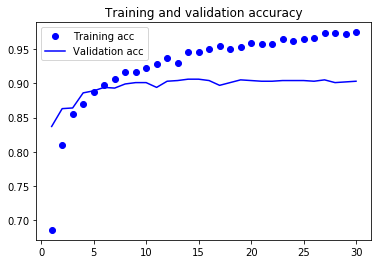

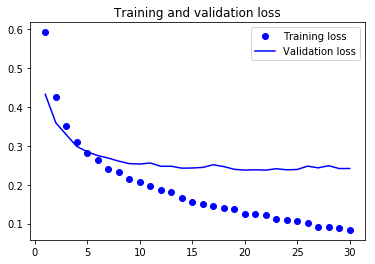

In [33]:
plot_accuracy_loss(history)